## ASSIGNMENT 2

# Prepare Data



In [ ]:
import pandas as pd
import numpy as np
from math import sqrt

df = pd.read_csv('https://www.stlouisfed.org/-/media/project/frbstl/stlouisfed/research/fred-md/monthly/current.csv?sc_lang=en&hash=80445D12401C59CF716410F3F7863B64')

df_cleaned = df.drop(index=0)
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned['sasdate'] = pd.to_datetime(df_cleaned['sasdate'], format='%m/%d/%Y')
df_cleaned.tail()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
789,2024-10-01,20055.073,16335.8,121.851,1538457.0,720393.0,102.2669,99.6883,99.0341,101.4706,...,119.218,129.168,31.53,36.27,28.07,70.5,554919.46,937096.10,5407.9247,19.9478
790,2024-11-01,20091.169,16376.8,122.396,1545040.0,725079.0,102.0231,99.4092,98.8277,100.8263,...,119.230,129.380,31.59,36.26,28.22,71.8,556011.41,938335.20,5381.4576,15.9822
791,2024-12-01,20101.629,16387.7,123.077,1558008.0,730336.0,103.1654,100.4972,99.9109,101.6275,...,119.746,129.875,31.72,36.43,28.33,74.0,559364.75,943484.76,5366.6207,15.6997
792,2025-01-01,20166.961,16398.1,122.323,1539183.0,721300.0,103.4350,101.2242,100.7728,102.4049,...,120.454,130.217,31.87,36.49,28.54,71.7,559196.39,944045.83,5349.7526,16.8122
793,2025-02-01,20255.984,16416.1,122.449,NaN,722708.0,104.2062,101.7245,101.3708,102.6407,...,120.609,130.705,31.94,36.55,28.64,64.7,NaN,NaN,5367.6508,17.0705


From csv file of the Dataset, the 2nd row indicating the transformation code for us to apply to reach stationary.

In [ ]:
# First selects the first row (0) and all columns starting from the second one (1:) of the DataFrame df. This row contains the transformation codes.

transformation_codes = df.iloc[0, 1:].to_frame().reset_index()
transformation_codes.columns = ['Series', 'Transformation_Code']

def apply_transformation(series, code):
    if code == 1:
        return series
    elif code == 2:
        return series.diff()
    elif code == 3:
        return series.diff().diff()
    elif code == 4:
        return np.log(series)
    elif code == 5:
        return np.log(series).diff()
    elif code == 6:
        return np.log(series).diff().diff()
    elif code == 7:
        return series.pct_change()
    else:
        raise ValueError("Invalid transformation code")

for series_name, code in transformation_codes.values:
    df_cleaned[series_name] = apply_transformation(df_cleaned[series_name].astype(float), float(code))

df_cleaned = df_cleaned[2:]
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,1959-03-01,0.006457,0.007325,0.009404,-0.003374,0.008321,0.014300,0.006036,0.004896,0.000000,...,-0.001148,0.000292,-0.000022,-0.008147,0.004819,NaN,0.004929,0.004138,-0.014792,NaN
1,1959-04-01,0.006510,0.007029,-0.003622,0.019915,0.000616,0.021080,0.014339,0.014545,0.015652,...,0.001312,0.001760,-0.000022,0.012203,-0.004890,NaN,0.012134,0.006734,0.024929,NaN
2,1959-05-01,0.005796,0.006618,0.012043,0.006839,0.007803,0.014954,0.008267,0.009580,0.004766,...,-0.001695,-0.001867,-0.000021,-0.004090,-0.004819,NaN,0.002828,0.002020,-0.015342,NaN
3,1959-06-01,0.003068,0.003012,0.003642,-0.000097,0.009064,0.001137,0.007035,0.007125,-0.004766,...,0.003334,0.001946,-0.004619,0.003992,0.004796,NaN,0.009726,0.009007,-0.012252,NaN
4,1959-07-01,-0.000580,-0.000762,-0.003386,0.012155,-0.000330,-0.024237,0.001168,0.008251,0.013056,...,-0.001204,-0.000013,0.000000,-0.004040,-0.004796,NaN,-0.004631,-0.001000,0.029341,NaN


In [ ]:
y = df_cleaned['INDPRO']
print(y)

0      0.014300
1      0.021080
2      0.014954
3      0.001137
4     -0.024237
         ...   
787   -0.003207
788   -0.002387
789    0.011134
790    0.002610
791    0.007428
Name: INDPRO, Length: 792, dtype: float64


# 1. Likelihood Function

Defining Unconditional (negative) log likelihood

In [ ]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm

def ar_likelihood(params, data, p):
    """
    Calculate the negative (unconditional) log likelihood for an AR(p) model.

    params: list of parameters, where the first p are AR coefficients and the last is the noise variance.
    data: observed data.
    p: order of the AR model.
    """
    # Extract AR coefficients and noise variance
    c = params[0]
    phi = params[1:p+1]
    sigma2 = params[-1]

    # Calculate residuals
    T = len(data)
    residuals = data[p:] - c - np.dot(np.column_stack([data[p-j-1:T-j-1] for j in range(p)]), phi)
    # Calculate negative log likelihood
    log_likelihood = (-T/2 * np.log(2 * np.pi * sigma2) - np.sum(residuals**2) / (2 * sigma2))
    return -log_likelihood


In [ ]:
def estimate_ar_parameters(data, p):
    """
    Estimate AR model parameters using maximum likelihood estimation.

    data: observed data.
    p: order of the AR model.
    """
    # Initial parameter guess (random AR coefficients, variance of 1)
    params_initial = np.zeros(p+2)
    params_initial[-1] = 1.0

    ## Bounds
    bounds = [(None, None)]
    # Then p AR coefficients, each bounded between -1 and 1
    bounds += [(-1, 1) for _ in range(p)]
    # The variance parameter, bounded to be positive
    bounds += [(1e-6, None)]

    # Minimize the negative log likelihood
    result = minimize(ar_likelihood, params_initial, args=(data, p), bounds=bounds)
    if result.success:
        estimated_params = result.x
        return estimated_params #Return parameters
    else:
        raise Exception("Optimization failed:", result.message)

p = 2  # AR(2) model

params_mle = estimate_ar_parameters(y, p) #Run model to take params
print("Estimated parameters:", params_mle)

#Finding Unconditional Log-likelihood
unconditional_log_likelihood = ar_likelihood(params_mle, y, p)
print("Unconditional Log-Likelihood:", unconditional_log_likelihood)

# Getting neg log-likelihood then try to minimize it to reach the maximum log-likelihood

Estimated parameters: [1.33728392e-03 2.76667082e-01 1.72964997e-02 9.00211218e-05]
Unconditional Log-Likelihood: -2565.104715773142


In [ ]:
# OLS to AR paras
def fit_ar_ols(data, p):


    T = len(data)
    Y = y[p:]
    X = np.column_stack([y[p-i-1:T-i-1] for i in range(p)])
    X = np.column_stack((np.ones(X.shape[0]), X))

    beta_hat = np.linalg.solve(X.T @ X, X.T @ Y)
    return beta_hat

In [ ]:
params_ols = fit_ar_ols(y, p) #Take params from OLS

print("MLE Estimated Parameters:", params_mle)
print("OLS Estimated Parameters:", params_ols)

MLE Estimated Parameters: [1.33728392e-03 2.76667082e-01 1.72964997e-02 9.00211218e-05]
OLS Estimated Parameters: [ 0.00144566  0.30613022 -0.06798235]


# 2. Prediction

**PREDICTION OF LOG DIFF**
* To have the predictions, we store the value of params for future 8 steps.
* Then we compare with the actual value

In [ ]:
# prediction for future 8 months
future_steps = 8
predictions_mle, predictions_ols = [], []
past_values = list(y[-p:])

for _ in range(future_steps):
    next_pred_mle = params_mle[0] + sum(params_mle[i+1] * past_values[-(i + 1)] for i in range(p))
    next_pred_ols = params_ols[0] + sum(params_ols[i+1] * past_values[-(i + 1)] for i in range(p))

    predictions_mle.append(next_pred_mle) #Store prediction value of params MLE
    predictions_ols.append(next_pred_ols) #Store prediction value of params OLS
    past_values.append(next_pred_mle)

actual_values_log_diff = df_cleaned['INDPRO'].values[-8:] #Take last 8 values
print("Prediction of log diff for Future 8 Months (MLE):", predictions_mle)
print("Prediction for log diff Future 8 Months (OLS):", predictions_ols)
print("Actual value of log diff for 8 Months:", actual_values_log_diff)


Prediction of log diff for Future 8 Months (MLE): [np.float64(0.0034375729318403365), np.float64(0.002416829611286514), np.float64(0.002065399094744461), np.float64(0.0019505145526511405), np.float64(0.0019126512637936185), np.float64(0.0019001886377007378), np.float64(0.001896085736940575), np.float64(0.0018947350395508433)]
Prediction for log diff Future 8 Months (OLS): [np.float64(0.003542245801385356), np.float64(0.0019930207640035734), np.float64(0.0019518348009179842), np.float64(0.00191364383031257), np.float64(0.0019023652729154544), np.float64(0.0018985842972390888), np.float64(0.0018973431461667687), np.float64(0.0018969343628765548)]
Actual value of log diff for 8 Months: [-0.00713606  0.00486916 -0.00412616 -0.00320703 -0.0023868   0.01113427
  0.00260987  0.00742823]


In [ ]:
# calculation of forecast error
mse_mle_log_diff = np.mean((predictions_mle - actual_values_log_diff) ** 2)
mse_ols_log_diff = np.mean((predictions_ols - actual_values_log_diff) ** 2)

forecast_log_diff = {
    "Month": range(1, 9),  # Months 1 to 8
    "MLE Prediction": predictions_mle,
    "OLS Prediction": predictions_ols,
    "Actual Value": actual_values_log_diff
}

forecast_table = pd.DataFrame(forecast_log_diff)
forecast_table.loc[len(forecast_table)] = ["MSE", mse_mle_log_diff, mse_ols_log_diff, np.nan]

print(forecast_table)

  Month  MLE Prediction  OLS Prediction  Actual Value
0     1        0.003438        0.003542     -0.007136
1     2        0.002417        0.001993      0.004869
2     3        0.002065        0.001952     -0.004126
3     4        0.001951        0.001914     -0.003207
4     5        0.001913        0.001902     -0.002387
5     6        0.001900        0.001899      0.011134
6     7        0.001896        0.001897      0.002610
7     8        0.001895        0.001897      0.007428
8   MSE        0.000040        0.000040           NaN


From the comparison table, we can see that MLE and OLS Prediction is quite the same with only small difference. We can plot it on graph for better visualization.

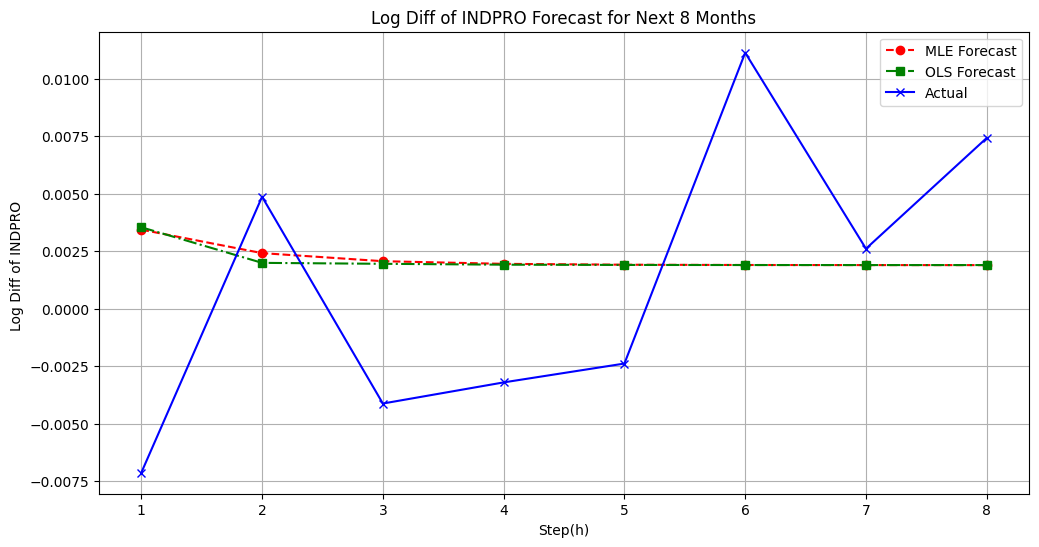

In [ ]:
# Plotting forecast and actual value to compare
import matplotlib.pyplot as plt
steps = range(1, future_steps + 1)

# Plot the forecasted values vs actual value
plt.figure(figsize=(12, 6))
plt.plot(steps, predictions_mle, label='MLE Forecast', color='red', linestyle='--', marker='o')
plt.plot(steps, predictions_ols, label='OLS Forecast', color='green', linestyle='-.', marker='s')
plt.plot(steps, actual_values_log_diff, label='Actual', color='blue', linestyle='-', marker='x')

plt.title('Log Diff of INDPRO Forecast for Next 8 Months')
plt.xlabel('Step(h)')
plt.ylabel('Log Diff of INDPRO ')
plt.xticks(steps)
plt.legend()
plt.grid(True)

plt.show()

Because we are comparing the Log Diff, so the difference between MLE and OLS method is not so clear. We will compare 2 method based on original scale to see the difference.

**PREDICTION OF ORIGINAL INDPRO VALUE*
* For comparing original value of INDPRO, we change to original scale to take original INDPRO, and do similarly.
* After generated prediction of 8 last periods, we then compare it with the actual value.

In [ ]:
# Original scale for forecasting the value of INDPRO
original_data = pd.read_csv('https://www.stlouisfed.org/-/media/project/frbstl/stlouisfed/research/fred-md/monthly/current.csv?sc_lang=en&hash=80445D12401C59CF716410F3F7863B64')
original_data['INDPRO'] = pd.to_numeric(original_data['INDPRO'], errors='coerce')
original_data.dropna(subset=['INDPRO'], inplace=True)

df['INDPRO_forecast_mle'] = np.nan
df['INDPRO_forecast_ols'] = np.nan
last_value = original_data['INDPRO'].iloc[-8] #Take last value of the previous 8 period

# MLE and OLS is returning future forecast (taking the last period, while we want to take forecast from previous 8 periods to compare with available value)
forecast_values_mle = [last_value * np.exp(sum(predictions_mle[:i+1])) for i in range(future_steps)]
forecast_values_ols = [last_value * np.exp(sum(predictions_ols[:i+1])) for i in range(future_steps)]
actual_values = original_data['INDPRO'].iloc[-future_steps:].values


print("Prediction for Future 8 Months (MLE):", forecast_values_mle)
print("Prediction for Future 8 Months (OLS):", forecast_values_ols)
print("Actual value for 8 months:", actual_values)


Prediction for Future 8 Months (MLE): [np.float64(102.8722236515511), np.float64(103.12114897172772), np.float64(103.33435540185418), np.float64(103.53610726185995), np.float64(103.73432522875775), np.float64(103.93162741121279), np.float64(104.12887763013237), np.float64(104.32636129373499)]
Prediction for Future 8 Months (OLS): [np.float64(102.88299214597195), np.float64(103.08824455379622), np.float64(103.2896522704359), np.float64(103.48750112197799), np.float64(103.68455952939934), np.float64(103.8816003961476), np.float64(104.07888653924341), np.float64(104.27650473068022)]
Actual value for 8 months: [102.5192 103.0196 102.5954 102.2669 102.0231 103.1654 103.435  104.2062]


In [ ]:
# calculate forecast error, then create a table to store result
mse_mle = np.mean((forecast_values_mle - actual_values) ** 2)
mse_ols = np.mean((forecast_values_ols - actual_values) ** 2)

forecast = {
    "Month": range(1, 9),  # Months 1 to 8
    "MLE Prediction": forecast_values_mle,
    "OLS Prediction": forecast_values_ols,
    "Actual Value": actual_values
}

forecast_table = pd.DataFrame(forecast)
forecast_table.loc[len(forecast_table)] = ["MSE", mse_mle, mse_ols, np.nan]

print(forecast_table)

  Month  MLE Prediction  OLS Prediction  Actual Value
0     1      102.872224      102.882992      102.5192
1     2      103.121149      103.088245      103.0196
2     3      103.334355      103.289652      102.5954
3     4      103.536107      103.487501      102.2669
4     5      103.734325      103.684560      102.0231
5     6      103.931627      103.881600      103.1654
6     7      104.128878      104.078887      103.4350
7     8      104.326361      104.276505      104.2062
8   MSE        0.787898        0.725229           NaN


From the result, we can see that OLS prediction (mean squared error=0.725) is slightly better than MLE prediction (mse=0.787)

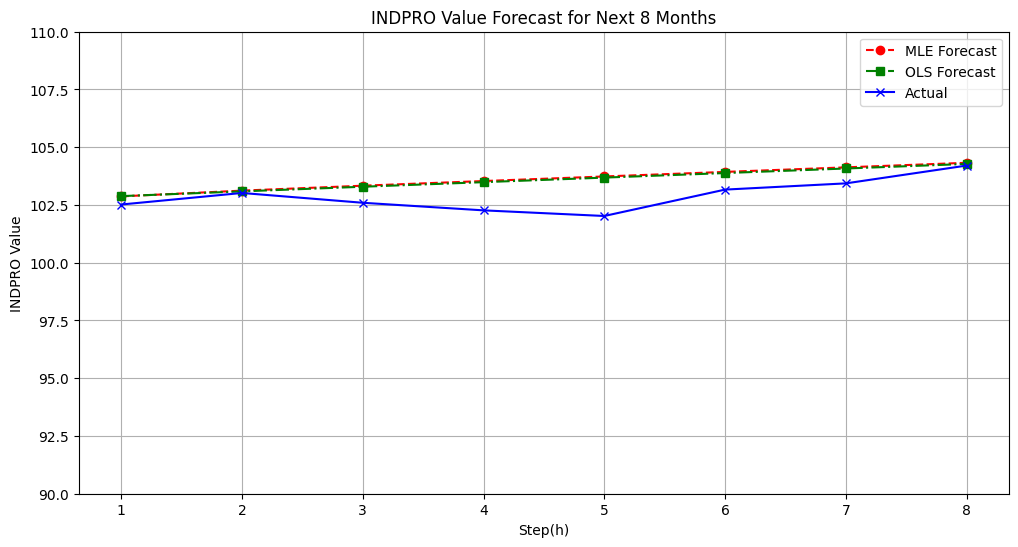

In [ ]:
# Plotting forecast and actual value to compare
import matplotlib.pyplot as plt
steps = range(1, future_steps + 1)

# Plot the forecasted values vs actual value
plt.figure(figsize=(12, 6))
plt.plot(steps, forecast_values_mle, label='MLE Forecast', color='red', linestyle='--', marker='o')
plt.plot(steps, forecast_values_ols, label='OLS Forecast', color='green', linestyle='-.', marker='s')
plt.plot(steps, actual_values, label='Actual', color='blue', linestyle='-', marker='x')

plt.title('INDPRO Value Forecast for Next 8 Months')
plt.xlabel('Step(h)')
plt.ylabel('INDPRO Value')
plt.xticks(steps)
plt.legend()
plt.grid(True)
plt.ylim(90, 110)

plt.show()